# Exercise 9: Classification

## 1- Binary Classification using Logistic Regression

Binary Classification is a type of classification problem where there are only two possible outcomes or two classes to predict. The goal is to classify new data points into Class 0 or Class 1 based on the input features.

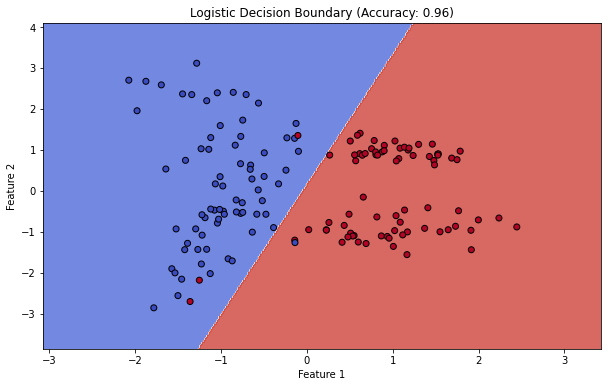

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic binary classification data
X, y = make_classification(
    n_samples=150,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
)

# Split the dataset into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4)

# Train Logistic Regression model with hyperparameters
model = LogisticRegression(
    C=1.0,
    max_iter=200,
    class_weight='balanced',
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict and calculate accuracy on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Create a mesh grid for contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary using contour plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm) # alpha controls the transparency of the plot 
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)

# Titles and labels
plt.title(f"Logistic Decision Boundary (Accuracy: {accuracy:.2f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## 2- Binary Classification using k-Nearest Neighbors (k-NN)

k-Nearest Neighbors (k-NN) is a simple, intuitive, and widely used algorithm for classification and regression. In binary classification, k-NN classifies data points into two classes based on the majority vote of their k nearest neighbors in the feature space.

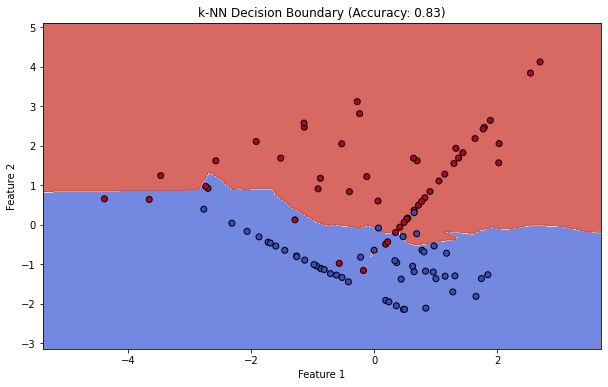

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic binary classification data
X, y = make_classification(
    n_samples=100, 
    n_features=2, 
    n_classes=2, 
    n_informative=2,  # 2 informative features
    n_redundant=0,    # 0 redundant features
)

# Step 2: Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4)

# Step 3: Train the k-Nearest Neighbors (k-NN) model with additional hyperparameters
knn = KNeighborsClassifier(
    n_neighbors=5,          # Number of neighbors to use for classification
    leaf_size=30,           # Controls the number of samples that can be stored in a leaf node of the BallTree or KDTree data structures.
    p=2,                    # Power parameter for the distance metric (p=2 corresponds to Euclidean distance)
    # p=2: Euclidean distance (straight-line distance, commonly used for continuous data).
    # p=1: Manhattan distance (sum of absolute differences, better for high-dimensional data).
)
knn.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = knn.predict(X_test)

# Step 5: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Step 6: Plot the decision boundary
plt.figure(figsize=(10, 6))

# Create mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict values for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm) # alpha controls the transparency of the plot 
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)

# Titles and labels
plt.title(f"k-NN Decision Boundary (Accuracy: {accuracy:.2f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## 3- Binary Classification using decision tree

A decision tree is a flowchart-like structure where each internal node represents a decision based on a feature, and each leaf node represents a class label

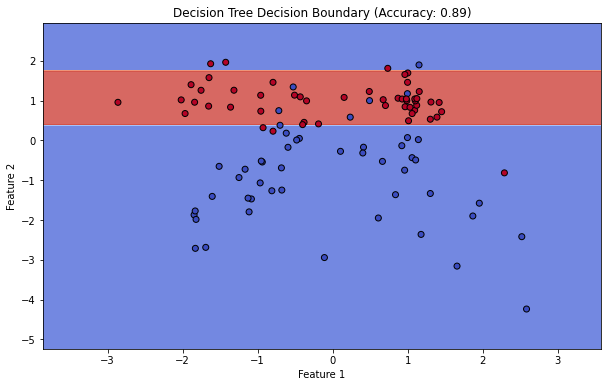

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic binary classification data
X, y = make_classification(
    n_samples=100, 
    n_features=2, 
    n_classes=2, 
    n_informative=2,  # 2 informative features
    n_redundant=0,    # 0 redundant features
)

# Step 2: Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4)

# Step 3: Train the Decision Tree model with additional hyperparameters
decision_tree = DecisionTreeClassifier(
    max_depth=4,                # Maximum depth of the tree
    min_samples_split=5,        # Minimum number of samples required to split an internal node
    min_samples_leaf=2,         # Minimum number of samples required to be at a leaf node
)
decision_tree.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Step 5: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Step 6: Plot the decision boundary
plt.figure(figsize=(10, 6))

# Create mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict values for each point in the mesh grid
Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)

# Titles and labels
plt.title(f"Decision Tree Decision Boundary (Accuracy: {accuracy:.2f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## 4- Binary Classification using Naive Bayes

Binary classification using Naive Bayes is a probabilistic classification technique based on Bayes' Theorem, which assumes that the features used for classification are independent of each other (hence the term "Naive"). 

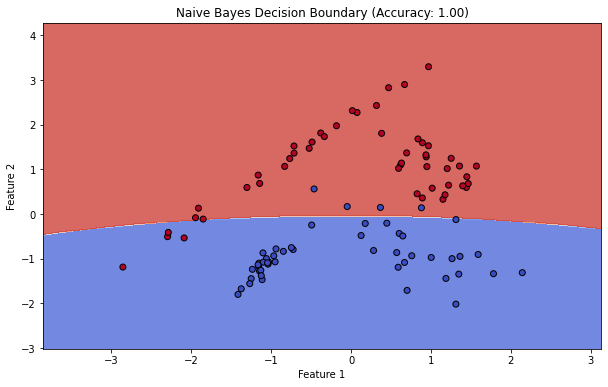

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic binary classification data

X, y = make_classification(
    n_samples=100, 
    n_features=2, 
    n_classes=2, 
    n_informative=2,  # 2 informative features
    n_redundant=0,    # 0 redundant features
)

# Step 2: Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4)

# Step 3: Train the Naive Bayes (GaussianNB) model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = nb.predict(X_test)

# Step 5: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Step 6: Plot the decision boundary
plt.figure(figsize=(10, 6))

# Create mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict values for each point in the mesh grid
Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)

# Titles and labels
plt.title(f"Naive Bayes Decision Boundary (Accuracy: {accuracy:.2f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## 5- Binary Classification using using SVM

Support Vector Machine (SVM) is one of the most powerful and popular algorithms for classification tasks, especially for binary classification. 

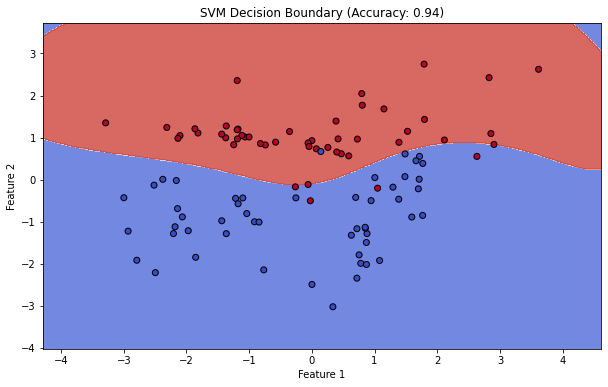

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic binary classification data
X, y = make_classification(
    n_samples=100, 
    n_features=2, 
    n_classes=2, 
    n_informative=2,  # 2 informative features
    n_redundant=0,    # 0 redundant features
)

# Step 2: Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4)

# Step 3: Train the Support Vector Machine (SVM) model
model = SVC(kernel='rbf')   # 'rbf' , 'poly' , 'sigmoid'
# The kernel plays a  role in how the SVM model finds the decision boundary.
# A kernel is a function that transforms the input data into a higher-dimensional space where it becomes easier to separate the data points using a linear decision boundary.

model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Step 6: Plot the decision boundary
plt.figure(figsize=(10, 6))

# Create mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict values for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)

# Titles and labels
plt.title(f"SVM Decision Boundary (Accuracy: {accuracy:.2f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
